#Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

In [3]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import LSTM

In [4]:
df = pd.read_csv('RiverDataResult.csv')

In [5]:
print(df.shape)

(2326, 22)


In [6]:
df.head()

,Date,Time,Temp,pH,ORP,EC,RES,TDS,Salinity,Pressure,D.O.,Turbidity,QpH,QTur,QTDS,QDO,WpH,WTur,WTDS,WDO,WQI,Result
0,17-02-2020,17:04:52,20.67,8.40,88.6,470,2128,306,0.23,14.568,101.5,36.7,65,47,55,95,16.575,9.165,9.625,35.625,70.990,4
1,17-02-2020,17:05:02,20.67,8.40,88.5,470,2128,305,0.23,14.569,101.4,42.4,65,38,55,95,16.575,7.410,9.625,35.625,69.235,3
2,17-02-2020,17:05:12,20.67,8.40,88.2,470,2128,305,0.23,14.569,101.5,38.2,65,47,55,95,16.575,9.165,9.625,35.625,70.990,4
3,17-02-2020,17:05:22,20.67,8.40,87.9,470,2128,305,0.23,14.567,101.7,38.0,65,47,55,95,16.575,9.165,9.625,35.625,70.990,4
4,17-02-2020,17:05:32,20.68,8.41,87.8,469,2132,305,0.23,14.566,101.7,46.8,65,38,55,95,16.575,7.410,9.625,35.625,69.235,3


#Train Test Splitting

In [7]:
X = df.iloc[:,[3,7,10,11]]

In [8]:
print(X)

       pH   TDS   D.O.  Turbidity
0     8.40  306  101.5       36.7
1     8.40  305  101.4       42.4
2     8.40  305  101.5       38.2
3     8.40  305  101.7       38.0
4     8.41  305  101.7       46.8
...    ...  ...    ...        ...
2321  8.94  299  124.9       12.3
2322  8.96  297  125.6       11.9
2323  8.98  296  125.9       11.8
2324  8.95  297  125.7       11.6
2325  8.93  299  125.7       13.6

[2326 rows x 4 columns]


In [9]:
Y=df['Result']

In [10]:
Y.head()

0    4
1    3
2    4
3    4
4    3
Name: Result, dtype: int64

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=45)

X_train = X_train.values
X_test = X_test.values

Y_train = Y_train.values
Y_test = Y_test.values

In [12]:
print(X_train)

[[  8.4  305.   101.4   42.4 ]
 [  8.88 295.   113.8   13.1 ]
 [  9.   278.   127.3   14.2 ]
 ...
 [  9.02 279.   123.1   12.2 ]
 [  8.94 294.   116.3   13.6 ]
 [  8.87 295.   113.4   14.3 ]]


#Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#Prediction

In [16]:
Y_pred = classifier.predict(X_test)

In [17]:
Y_predt = classifier.predict(X_train)

#Metrics 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[  1   1   0]
 [  0 362   9]
 [  0   4 391]]
              precision    recall  f1-score   support

           2       1.00      0.50      0.67         2
           3       0.99      0.98      0.98       371
           4       0.98      0.99      0.98       395

    accuracy                           0.98       768
   macro avg       0.99      0.82      0.88       768
weighted avg       0.98      0.98      0.98       768



#Accuracy

In [19]:
acc1 = accuracy_score(Y_train, Y_predt)
print(acc1);

0.9890885750962772


In [20]:
acc = accuracy_score(Y_test, Y_pred)
print(acc);

0.9817708333333334


In [21]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

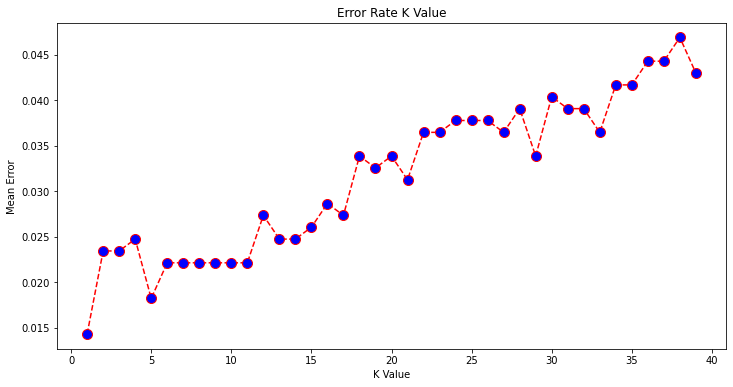

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [23]:
pr = classifier.predict_proba(X_test)

#Loss

In [24]:
sklearn.metrics.log_loss(Y_test, pr,eps=1e-15, normalize=True, sample_weight=None, labels=None)

0.12800461528366044